In [1]:
'''Import the libraries'''
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow import keras
from keras import layers
import matplotlib.image as img

%matplotlib inline

In [2]:
!pip install split-folders
'''To train the data 60 in 20 and 20'''
import splitfolders
splitfolders.ratio('./dataset', output="output", seed=1337, ratio=(.6, 0.2,0.2))

Copying files: 4000 files [00:05, 780.37 files/s] 


In [3]:
'''To preprocess data with keras'''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(128, 128),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(128, 128),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(128, 128),
batch_size=64
)

Found 2400 files belonging to 5 classes.
Found 800 files belonging to 5 classes.
Found 800 files belonging to 5 classes.


In [4]:
class_names = train_ds.class_names
print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


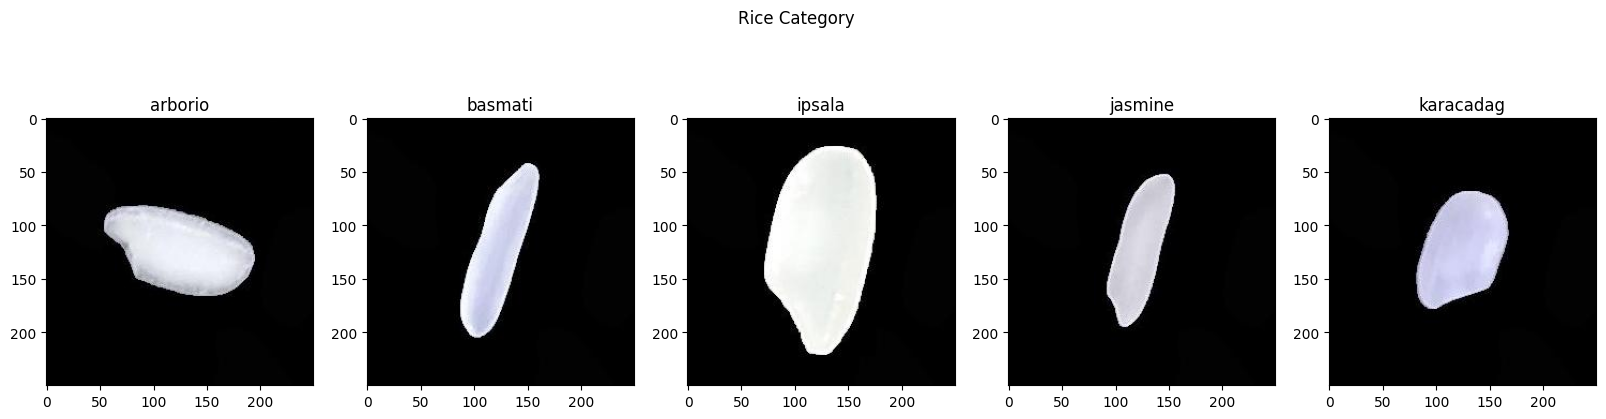

In [5]:
'''To create the figure'''
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
'''To take data types to predict'''
arborio_img = img.imread('./dataset/Arborio/Arborio (201).jpg')
basmati_img = img.imread('./dataset//Basmati/basmati (201).jpg')
ipsala_img = img.imread('./dataset/Ipsala/Ipsala (201).jpg')
jasmine_img = img.imread('./dataset/Jasmine/Jasmine (201).jpg')
karacadag_img = img.imread('./dataset/Karacadag/Karacadag (201).jpg')

'''Give names to images'''
ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')
'''Run the images of the types of rice'''
ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

In [6]:
from tensorflow import keras
loaded_model = keras.models.load_model(r"C:\Users\Lenovo\Project_Phase-1\Grain_Type\my_model.h5")

1/1 [==============================] - 0s 211ms/step
Jasmine
1/1 [==============================] - 0s 30ms/step
Jasmine
1/1 [==============================] - 0s 34ms/step
Ipsala
1/1 [==============================] - 0s 36ms/step
Ipsala
1/1 [==============================] - 0s 33ms/step
Ipsala
1/1 [==============================] - 0s 32ms/step
Jasmine
1/1 [==============================] - 0s 31ms/step
Ipsala
1/1 [==============================] - 0s 31ms/step
Ipsala
1/1 [==============================] - 0s 30ms/step
Arborio
1/1 [==============================] - 0s 30ms/step
Ipsala
1/1 [==============================] - 0s 33ms/step
Ipsala
1/1 [==============================] - 0s 32ms/step
Basmati
1/1 [==============================] - 0s 30ms/step
Jasmine


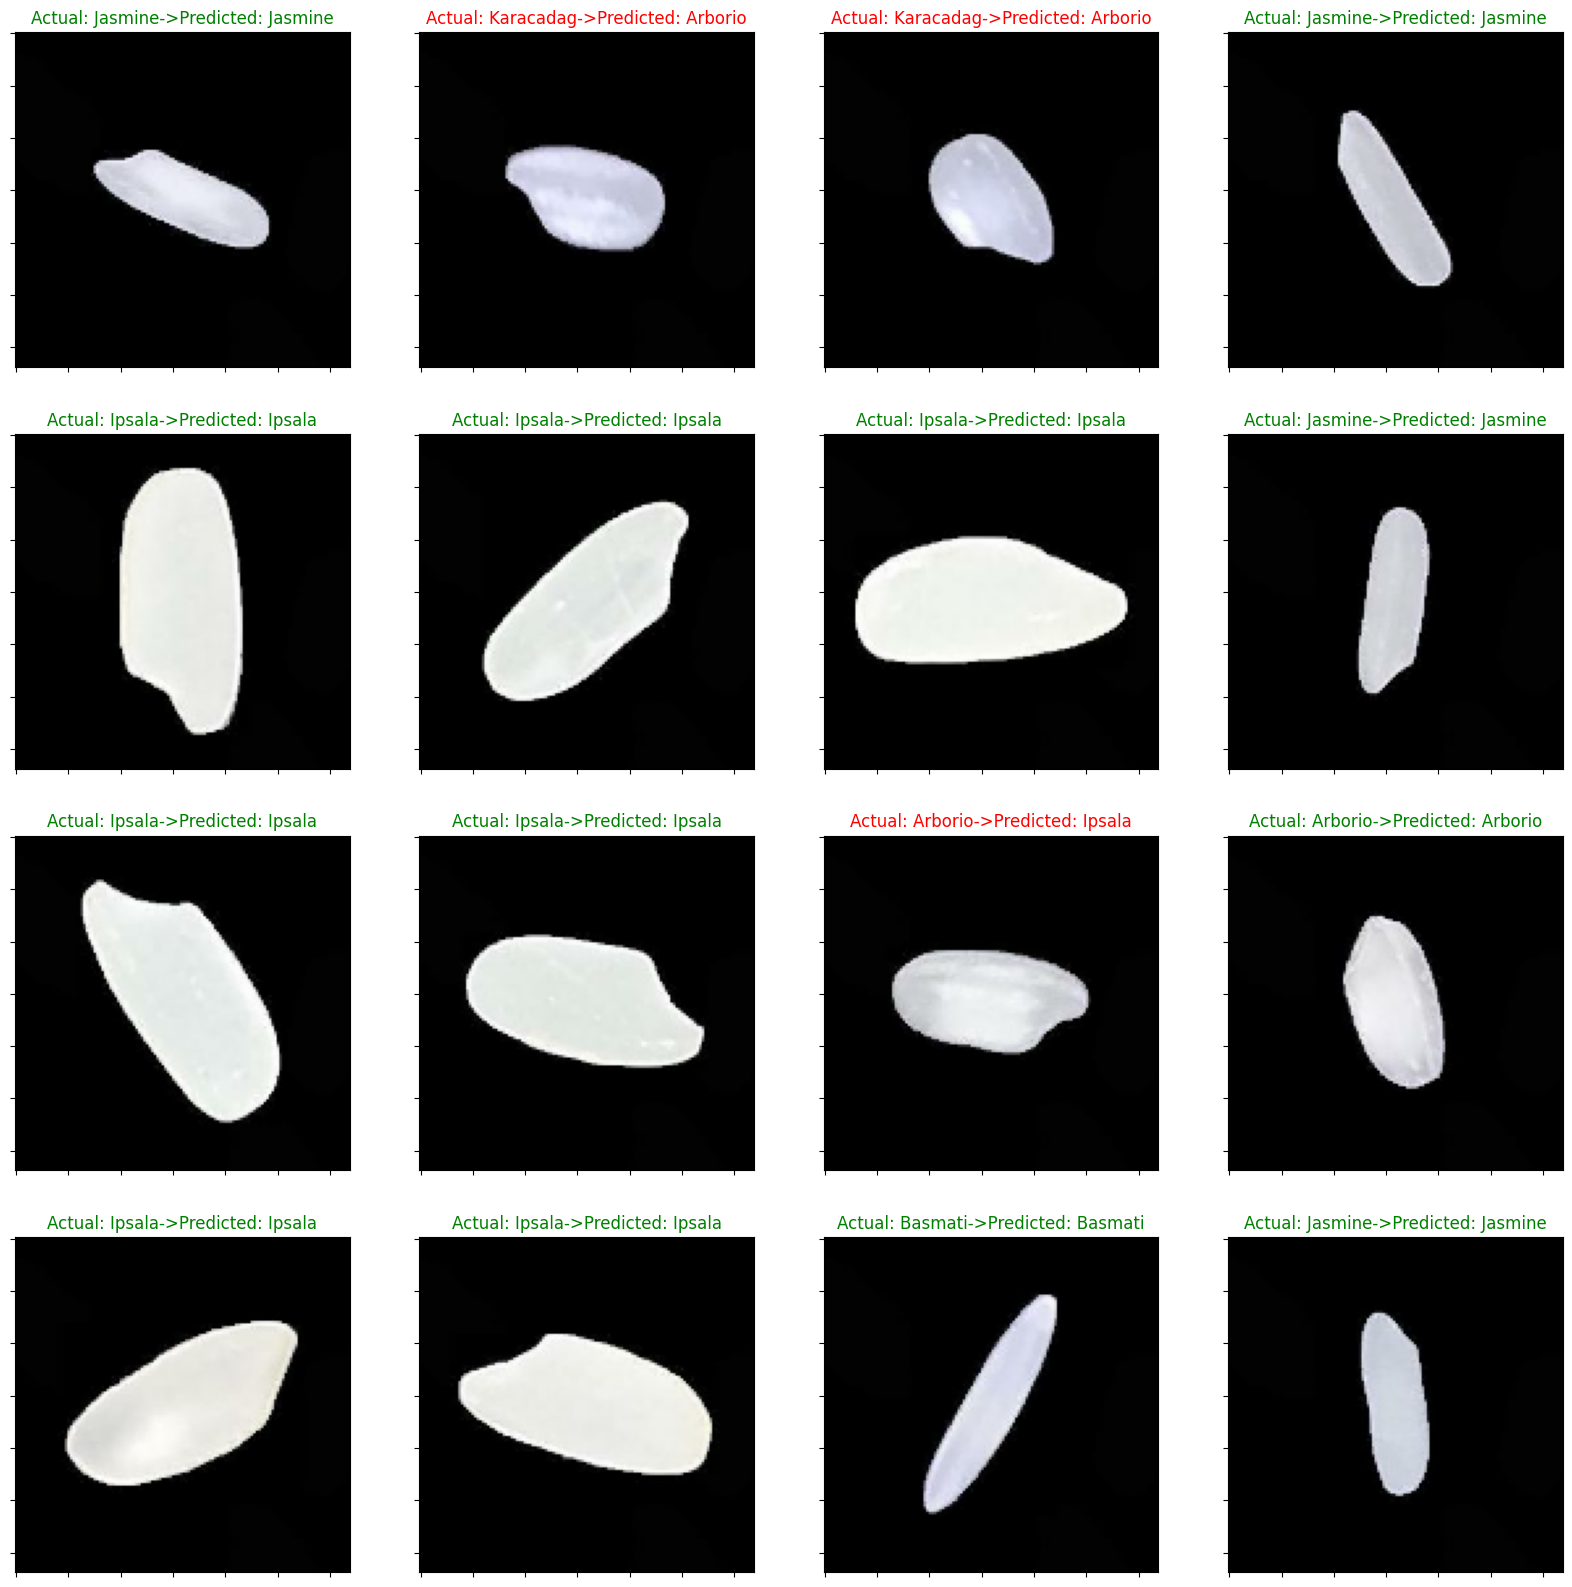

In [7]:
'''The graphs of the prediction layers are created'''
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = loaded_model.predict(tf.expand_dims(images[i], 0))
#         print(predictions)
        score = tf.nn.softmax(predictions[0])
        
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]]+"->Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            print(class_names[np.argmax(score)])
            
        else:
            plt.title("Actual: "+class_names[labels[i]]+"->Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        '''The graphs are shown with the prediction'''
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

In [8]:
# bounding boxes
import cv2

# Load the image
image = cv2.imread(r"C:\Users\Lenovo\Downloads\MicrosoftTeams-image (32).png", cv2.IMREAD_GRAYSCALE)


# Apply a binary threshold to separate the grains from the background
_, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Find contours in the binary mask
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a list to store the bounding boxes
bounding_boxes = []

# Iterate through the contours and extract bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    bounding_boxes.append((x, y, x + w, y + h))

# Draw the bounding boxes on the original image (optional)
for box in bounding_boxes:
    x1, y1, x2, y2 = box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green color

# Save or display the result
cv2.imshow('Thresholded Image with Green Bounding Boxes', thresh)
cv2.imshow('bounding boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Bounding boxes are now stored in the 'bounding_boxes' list
print("Bounding boxes:", bounding_boxes)


Bounding boxes: [(0, 683, 39, 710), (60, 618, 121, 654), (337, 543, 364, 610), (391, 507, 440, 575), (28, 474, 66, 528), (420, 413, 497, 438), (99, 366, 134, 410), (436, 262, 474, 307), (275, 255, 340, 299), (0, 242, 22, 317), (142, 218, 175, 250), (90, 205, 131, 236), (486, 192, 523, 227), (354, 184, 427, 224), (49, 131, 73, 191), (276, 104, 327, 158), (346, 86, 411, 119), (61, 86, 100, 152), (102, 51, 130, 85), (376, 49, 409, 76), (120, 21, 160, 61), (519, 8, 583, 35), (302, 0, 328, 23)]


In [9]:
#  all images 250*250 dim
import cv2
import numpy as np

# Load the image
image = cv2.imread(r"C:\Users\Lenovo\Downloads\MicrosoftTeams-image (32).png", cv2.IMREAD_GRAYSCALE)

# Apply a binary threshold to separate the grains from the background
_, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Find contours in the binary mask
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a list to store the bounding boxes
bounding_boxes = []

# Iterate through the contours and extract bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    bounding_boxes.append((x, y, x + w, y + h))

# Iterate through bounding boxes, extract ROIs, paste on black background, and display them
for i, box in enumerate(bounding_boxes):
    x1, y1, x2, y2 = box
    roi = thresh[y1:y2, x1:x2]

    new_height, new_width = 250, 250  # You can change these values as needed

    # Create a black background
    black_background = np.zeros((new_height, new_width), dtype=np.uint8)

    # Calculate the position to paste the ROI in the center
    x_offset = (new_width - roi.shape[1]) // 2
    y_offset = (new_height - roi.shape[0]) // 2

    # Paste the ROI onto the black background
    black_background[y_offset:y_offset+roi.shape[0], x_offset:x_offset+roi.shape[1]] = roi

    cv2.imshow(f'ROI {i}', black_background)

# Optionally, display the bounding boxes
cv2.imshow('Thresholded Image with Green Bounding Boxes', thresh)
cv2.imshow('Bounding Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:

#  all images 250*250 dim
import cv2
import numpy as np

# Load the image
image = cv2.imread(r"C:\Users\Lenovo\Downloads\MicrosoftTeams-image (32).png", cv2.IMREAD_GRAYSCALE)

# Apply a binary threshold to separate the grains from the background
_, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Find contours in the binary mask
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a list to store the bounding boxes
bounding_boxes = []

# Iterate through the contours and extract bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    bounding_boxes.append((x, y, x + w, y + h))
    
all=[]

# Iterate through bounding boxes, extract ROIs, paste on black background, and display them
for i, box in enumerate(bounding_boxes):
    x1, y1, x2, y2 = box
    roi = thresh[y1:y2, x1:x2]

    new_height, new_width = 250, 250  # You can change these values as needed

    # Create a black background
    black_background = np.zeros((new_height, new_width), dtype=np.uint8)

    # Calculate the position to paste the ROI in the center
    x_offset = (new_width - roi.shape[1]) // 2
    y_offset = (new_height - roi.shape[0]) // 2

    # Paste the ROI onto the black background
    black_background[y_offset:y_offset+roi.shape[0], x_offset:x_offset+roi.shape[1]] = roi
    
    color_image = cv2.cvtColor(black_background, cv2.COLOR_GRAY2BGR)

    # Resize the image to (128, 128) using cubic interpolation
    reshaped_image = cv2.resize(color_image, (128, 128), interpolation=cv2.INTER_CUBIC)

    # Add batch size and channel dimension
    input_data = np.expand_dims(reshaped_image, axis=0)
    
    input_data = input_data.astype(np.float32)

    
    print(input_data.shape)
    
    predictions = loaded_model.predict(input_data)
#         print(predictions)
    score = tf.nn.softmax(predictions[0])
        
    if(class_names[labels[i]]==class_names[np.argmax(score)]):
        all.append(class_names[np.argmax(score)])
        print(class_names[np.argmax(score)])
            

#     cv2.imshow(f'ROI {i}', black_background)


string_count = {}

# Iterate through the array and count the occurrences of each string
for string in all:
    if string in string_count:
        string_count[string] += 1
    else:
        string_count[string] = 1

# Find the string with the maximum count
max_count = max(string_count.values())
most_repeated_strings = [string for string, count in string_count.items() if count == max_count]

print("The most repeated string(s):", most_repeated_strings)
print("Repetition count:", max_count)

cv2.imshow('Thresholded Image with Green Bounding Boxes', thresh)
cv2.imshow('Bounding Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1, 128, 128, 3)
1/1 [==============================] - 0s 28ms/step
Jasmine
(1, 128, 128, 3)
1/1 [==============================] - 0s 27ms/step
(1, 128, 128, 3)
1/1 [==============================] - 0s 39ms/step
(1, 128, 128, 3)
1/1 [==============================] - 0s 34ms/step
Jasmine
(1, 128, 128, 3)
1/1 [==============================] - 0s 29ms/step
(1, 128, 128, 3)
1/1 [==============================] - 0s 29ms/step
(1, 128, 128, 3)
1/1 [==============================] - 0s 28ms/step
(1, 128, 128, 3)
1/1 [==============================] - 0s 29ms/step
Jasmine
(1, 128, 128, 3)
1/1 [==============================] - 0s 27ms/step
(1, 128, 128, 3)
1/1 [==============================] - 0s 28ms/step
(1, 128, 128, 3)
1/1 [==============================] - 0s 28ms/step
(1, 128, 128, 3)
1/1 [==============================] - 0s 27ms/step
(1, 128, 128, 3)
1/1 [==============================] - 0s 29ms/step
(1, 128, 128, 3)
1/1 [==============================] - 0s 27ms/step
(1, 128, 1

In [11]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import optimizers
from keras.layers import Dropout

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [12]:
def crop_resize_img(img):
    ht, wd= img.shape

    ww = 300
    hh = 300
    color = 0
    result = np.full((hh,ww), color, dtype=np.uint8)

    xx = (ww - wd) // 2
    yy = (hh - ht) // 2

    result[yy:yy+ht, xx:xx+wd] = img

    final =cv2.resize(result, (50,50))
    
    return final

In [13]:
def pre_process_And_Count(image_path, output_path):
    input_rice = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    output_adapthresh = cv2.adaptiveThreshold (input_rice, 255.0, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, -20.0)

    cv2.imwrite('rice_adapthresh.png', output_adapthresh)

    kernel = np.ones((5,5),np.uint8)
    output_erosion = cv2.erode(output_adapthresh, kernel)

    cv2.imwrite('rice_erosion.png', output_erosion)

    contours, hierarchy = cv2.findContours(output_erosion, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE)
    output_contour = cv2.cvtColor(input_rice, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
    print("Number of detected contours", len(contours))
    cv2.imwrite('rice_contours.png', output_contour)
    k=1
    temp = 0.70 * len(contours)
    for i in contours:
        x, y, width, height = cv2.boundingRect(i)
        roi = output_erosion[y:y+height, x:x+width]
        roi=crop_resize_img(roi)
        path  = ''
        if output_path !='mixed/mixed_':
            if k<temp:
                path = 'dataset/train/'+output_path

            else:
                path = 'dataset/test/'+output_path
        else:
            path = output_path
        cv2.imwrite(path+str(k)+".png", roi)
        k+=1


In [14]:
img_width = 50
img_height = 50

if K.image_data_format() == 'channels_first':
    input_shape = (1, img_width, img_height)
else:
    input_shape = (img_width, img_height, 1)
    
input_shape

(50, 50, 1)

In [15]:
from tensorflow import keras
loaded_model = keras.models.load_model(r"C:\Users\Lenovo\Project_Phase-1\Grain_Count\grain_count.h5")

In [16]:
import os
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [17]:
create_directory('mixed')

In [18]:
mixed = r"C:\Users\Lenovo\Downloads\MicrosoftTeams-image (32).png"

In [19]:
pre_process_And_Count(mixed, 'mixed/mixed_')

Number of detected contours 23


In [20]:
import os
from os import listdir
from os.path import isfile, join

In [21]:
# {'broken_rice': 0, 'full_rice': 1}

predict_dir_path='mixed/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]

# predicting images
from tensorflow.keras.preprocessing import image
full = 0 
broken  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+'/'+file, target_size=(img_width, img_height), grayscale=True)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = loaded_model.predict(images, batch_size=32)
    classes = classes[0][0]
    if classes == 0:
        broken += 1
    else:
        full += 1
    
print("Total full :",full)
print("Total broken :",broken)

1/1 [==============================] - 0s 22ms/step


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
Total full : 13
Total broken : 10


In [22]:
print("Detected rice type:",most_repeated_strings)
print("Total No of rice grains:",(broken+full))
print("Total full size grains:",full)
print("Total broken grains:",broken)
Percent = (broken/(broken+full))*100
if(Percent >= 0 and Percent < 25.0):
    print("Grade A")
elif(Percent >= 25.0 and Percent < 50.0):
    print("Grade B")
elif(Percent >= 50.0 and Percent < 75.0):
    print("Grade C")
elif(Percent >= 75.0 and Percent < 100.0):
    print("Grade D")
else:
    print("Grade E")

Detected rice type: ['Jasmine']
Total No of rice grains: 23
Total full size grains: 13
Total broken grains: 10
Grade B
